In [1]:
#Assigment 1 Machine Learning
#Student1 Name : Ali Halayqa    ID : 1201769  Sec : 1
#Student2 Name : Mohammad Shreteh    ID : 1201369  Sec : 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 . Document Missing Values: Check for missing values and document their frequency and
# distribution across features.

# Load the dataset
dataSetPath = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
dataFrame = pd.read_csv(dataSetPath)

# Get an overview of the dataset
print("Dataset Overview:")
print(f"Number of examples (rows): {dataFrame.shape[0]}")
print(f"Number of features (columns): {dataFrame.shape[1]}")
print("\nSample data:\n", dataFrame.head())

# Check for missing values
print("\nMissing Values :")
missingValues = dataFrame.isnull().sum()
missingValues = missingValues[missingValues > 0]  # Filter out columns with no missing values
missingPercentage = (missingValues / len(dataFrame)) * 100  # Calculate missing percentage

# Combine missing values and percentages into a DataFrame for easier readability
missing_report = pd.DataFrame({
    'Missing Values': missingValues,
    'Percentage (%)': missingPercentage
}).sort_values(by='Missing Values', ascending=False)

print(missing_report)
dataFrame.info()
dataFrame.describe()

Dataset Overview:
Number of examples (rows): 210165
Number of features (columns): 17

Sample data:
    VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alter

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


After Dropping Missing Values:
Number of rows: 209709


<ipython-input-2-5d87e5de64e8>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_imputation[mis_col].fillna(df_mean_imputation[mis_col].mean(), inplace=True)


County                  0
City                    0
Postal Code             0
Electric Range          0
Base MSRP               0
Legislative District    0
Vehicle Location        0
Electric Utility        0
2020 Census Tract       0
dtype: int64

After Mean Imputation:
Number of rows: 210165
County                   4
City                     4
Postal Code              0
Electric Range           0
Base MSRP                0
Legislative District     0
Vehicle Location        10
Electric Utility         4
2020 Census Tract        0
dtype: int64

After Median Imputation:
Number of rows: 210165


<ipython-input-2-5d87e5de64e8>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_imputation[mis_col].fillna(df_median_imputation[mis_col].median(), inplace=True)


County                   4
City                     4
Postal Code              0
Electric Range           0
Base MSRP                0
Legislative District     0
Vehicle Location        10
Electric Utility         4
2020 Census Tract        0
dtype: int64


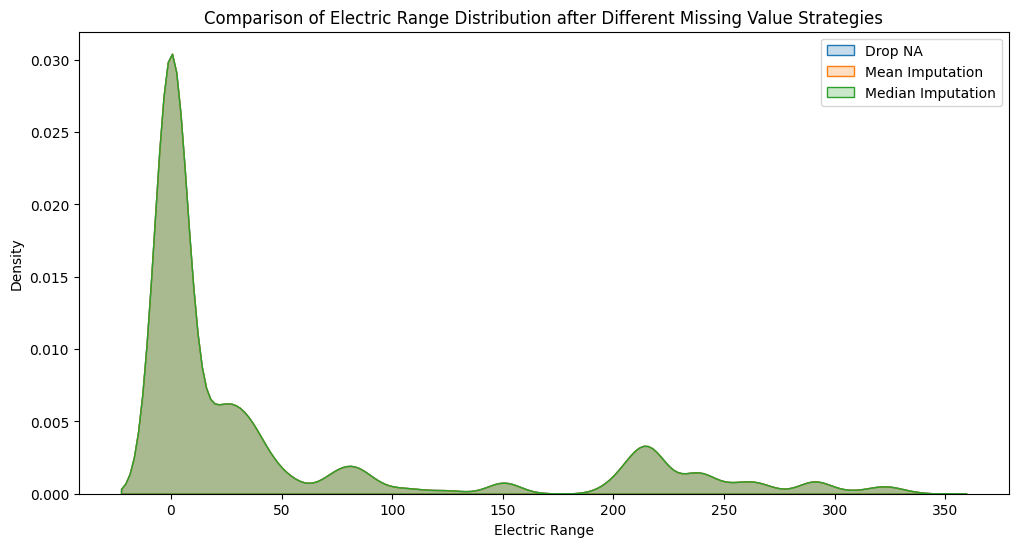

In [2]:
# 2. Missing Value Strategies: If missing values are present, apply multiple strategies (e.g.,
# mean/median imputation, dropping rows) and compare their impact on the analysis.

import matplotlib.pyplot as plt
import seaborn as sns

# Identify columns with missing values
missing_columns = dataFrame.columns[dataFrame.isnull().any()]

# Option 1: Drop rows with missing values
df_dropna = dataFrame.dropna()
print("After Dropping Missing Values:")
print(f"Number of rows: {df_dropna.shape[0]}")
print(df_dropna[missing_columns].isnull().sum())

# Option 2: Mean Imputation
df_mean_imputation = dataFrame.copy()
for mis_col in missing_columns:
    if df_mean_imputation[mis_col].dtype in ['float64', 'int64']:  # Apply only to numeric columns
        df_mean_imputation[mis_col].fillna(df_mean_imputation[mis_col].mean(), inplace=True)

print("\nAfter Mean Imputation:")
print(f"Number of rows: {df_mean_imputation.shape[0]}")
print(df_mean_imputation[missing_columns].isnull().sum())

# Option 3: Median Imputation
df_median_imputation = dataFrame.copy()
for mis_col in missing_columns:
    if df_median_imputation[mis_col].dtype in ['float64', 'int64']:  # Apply only to numeric columns
        df_median_imputation[mis_col].fillna(df_median_imputation[mis_col].median(), inplace=True)

print("\nAfter Median Imputation:")
print(f"Number of rows: {df_median_imputation.shape[0]}")
print(df_median_imputation[missing_columns].isnull().sum())

# example applying in Electric Range
feature = 'Electric Range'

plt.figure(figsize=(12, 6))
sns.kdeplot(df_dropna[feature], label='Drop NA', fill=True)
sns.kdeplot(df_mean_imputation[feature], label='Mean Imputation', fill=True)
sns.kdeplot(df_median_imputation[feature], label='Median Imputation', fill=True)
plt.xlabel(feature)
plt.ylabel('Density')
plt.title(f"Comparison of {feature} Distribution after Different Missing Value Strategies")
plt.legend()
plt.show()

Missing Values Documentation:
County: 4 missing values
City: 4 missing values
Postal Code: 4 missing values
Electric Range: 5 missing values
Base MSRP: 5 missing values
Legislative District: 445 missing values
Vehicle Location: 10 missing values
Electric Utility: 4 missing values
2020 Census Tract: 4 missing values

Impact of Missing Value Strategies on Electric Range:
Dropping Rows (Strategy 1):

Mean: 50.60
Std: 86.97
Median: 0.00
Max: 337.00
This strategy slightly reduces the dataset size (removes 5 rows).
Mean Imputation (Strategy 2):

Mean: 50.60
Std: 86.97
Median: 0.00
Max: 337.00
This strategy maintains the dataset size and introduces the mean value for the missing entries.
Median Imputation (Strategy 3):

Mean: 50.60
Std: 86.97
Median: 0.00
Max: 337.00

Similar to mean imputation, this strategy retains the full dataset size but uses the median value for missing entries.
The mean and median imputation yield very similar results, with no significant changes in the statistics of the column.

Original Dataset:
   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel

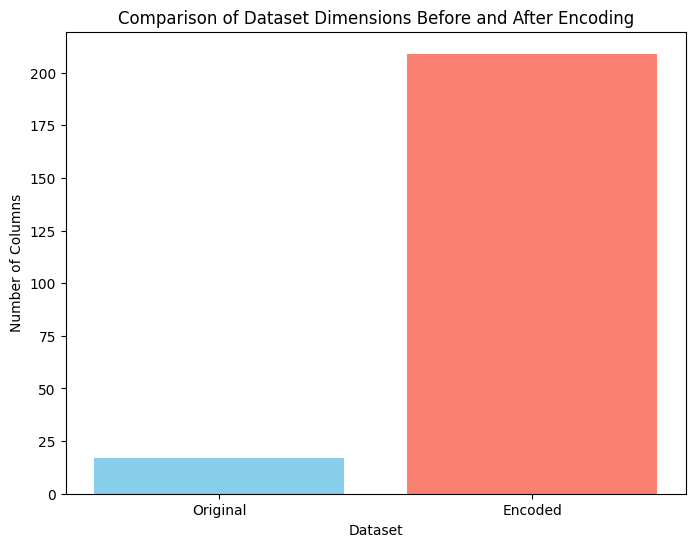

In [3]:
# 3. Feature Encoding: Encode categorical features (e.g., Make, Model) using techniques like
# one-hot encoding

# Display the first few rows of the original dataset
import pandas as pd
import matplotlib.pyplot as plt

# Display the first few rows of the original dataset
print("Original Dataset:")
print(dataFrame.head())

# Identify categorical features for encoding
categorical_features = ['Make', 'Model']

# Perform one-hot encoding
df_encoded = pd.get_dummies(dataFrame, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded dataset
print("\nEncoded Dataset:")
print(df_encoded.head())

# Display the shape of the original and encoded datasets
print("\nOriginal Dataset Shape:", dataFrame.shape)
print("Encoded Dataset Shape:", df_encoded.shape)

# Plot the shape comparison before and after encoding
plt.figure(figsize=(8, 6))
categories = ['Original', 'Encoded']
num_columns = [dataFrame.shape[1], df_encoded.shape[1]]

plt.bar(categories, num_columns, color=['skyblue', 'salmon'])
plt.xlabel("Dataset")
plt.ylabel("Number of Columns")
plt.title("Comparison of Dataset Dimensions Before and After Encoding")
plt.show()



Original Dataset:
   VIN (1-10)     County       City State  Postal Code  Model Year     Make  \
0  5UXTA6C0XM     Kitsap    Seabeck    WA      98380.0        2021      BMW   
1  5YJ3E1EB1J     Kitsap    Poulsbo    WA      98370.0        2018    TESLA   
2  WP0AD2A73G  Snohomish    Bothell    WA      98012.0        2016  PORSCHE   
3  5YJ3E1EB5J     Kitsap  Bremerton    WA      98310.0        2018    TESLA   
4  1N4AZ1CP3K       King    Redmond    WA      98052.0        2019   NISSAN   

      Model                   Electric Vehicle Type  \
0        X5  Plug-in Hybrid Electric Vehicle (PHEV)   
1   MODEL 3          Battery Electric Vehicle (BEV)   
2  PANAMERA  Plug-in Hybrid Electric Vehicle (PHEV)   
3   MODEL 3          Battery Electric Vehicle (BEV)   
4      LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible            30.0   
1           Clean Alternative Fuel

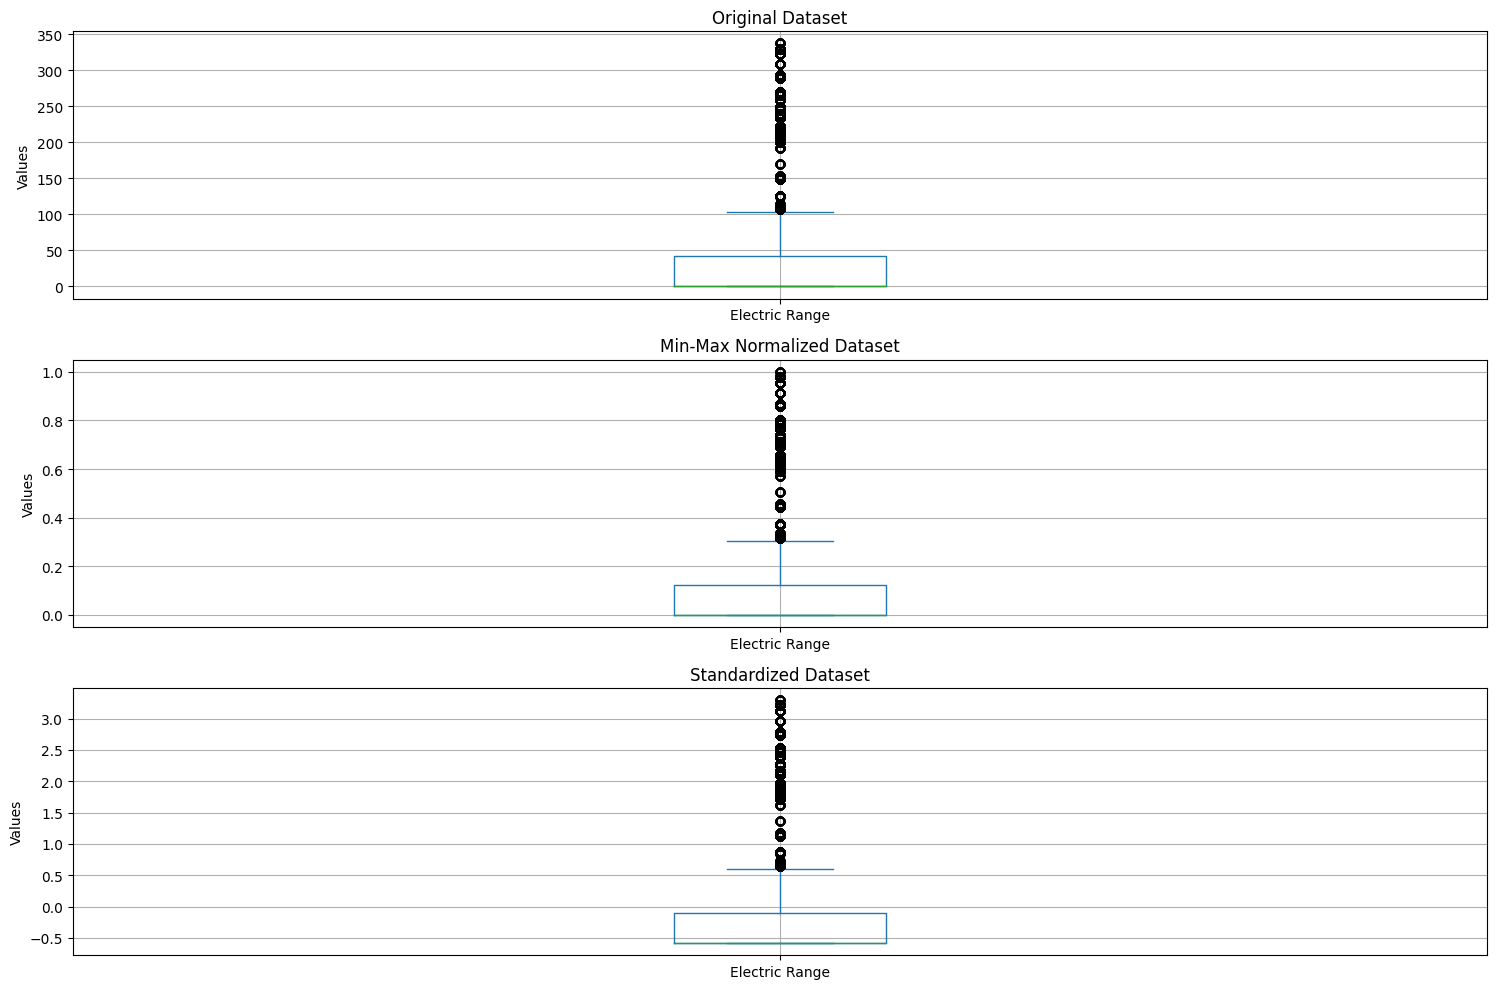


Original Dataset Shape: (210165, 17)
Min-Max Scaled Dataset Shape: (210165, 17)
Standardized Dataset Shape: (210165, 17)


In [4]:
# 4. Normalization: Normalize numerical features if necessary for chosen analysis methods

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Display the first few rows of the original dataset
print("Original Dataset:")
print(dataFrame.head())

# Identify numerical features for normalization
numerical_features = ['Electric Range', 'Some Other Numeric Feature']  # Add relevant numeric columns

# Check if numerical features exist in the DataFrame
numerical_features = [feature for feature in numerical_features if feature in dataFrame.columns]

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_min_max_scaled = dataFrame.copy()
df_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(dataFrame[numerical_features])

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = dataFrame.copy()
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(dataFrame[numerical_features])

# Plotting the original, Min-Max scaled, and standardized datasets
plt.figure(figsize=(15, 10))

# Plot original dataset
plt.subplot(3, 1, 1)
plt.title("Original Dataset")
dataFrame[numerical_features].plot(kind='box', ax=plt.gca())
plt.ylabel("Values")
plt.grid()

# Plot Min-Max normalized dataset
plt.subplot(3, 1, 2)
plt.title("Min-Max Normalized Dataset")
df_min_max_scaled[numerical_features].plot(kind='box', ax=plt.gca())
plt.ylabel("Values")
plt.grid()

# Plot standardized dataset
plt.subplot(3, 1, 3)
plt.title("Standardized Dataset")
df_standard_scaled[numerical_features].plot(kind='box', ax=plt.gca())
plt.ylabel("Values")
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

print("\nOriginal Dataset Shape:", dataFrame.shape)
print("Min-Max Scaled Dataset Shape:", df_min_max_scaled.shape)
print("Standardized Dataset Shape:", df_standard_scaled.shape)



Summary Statistics for Normalized Data:
                Mean (Min-Max)  Median (Min-Max)  Std Dev (Min-Max)  \
Electric Range        0.150155          0.000000           0.258081   
Base MSRP             0.001062          0.000000           0.009058   
Postal Code           0.985704          0.985160           0.024993   
Model Year            0.848025          0.884615           0.114959   

                Mean (Z-Score)  Median (Z-Score)  Std Dev (Z-Score)  
Electric Range    2.840007e-18         -0.581816           1.000002  
Base MSRP         8.520021e-18         -0.117289           1.000002  
Postal Code       1.844643e-15         -0.021759           1.000002  
Model Year       -1.736501e-14          0.318288           1.000002  


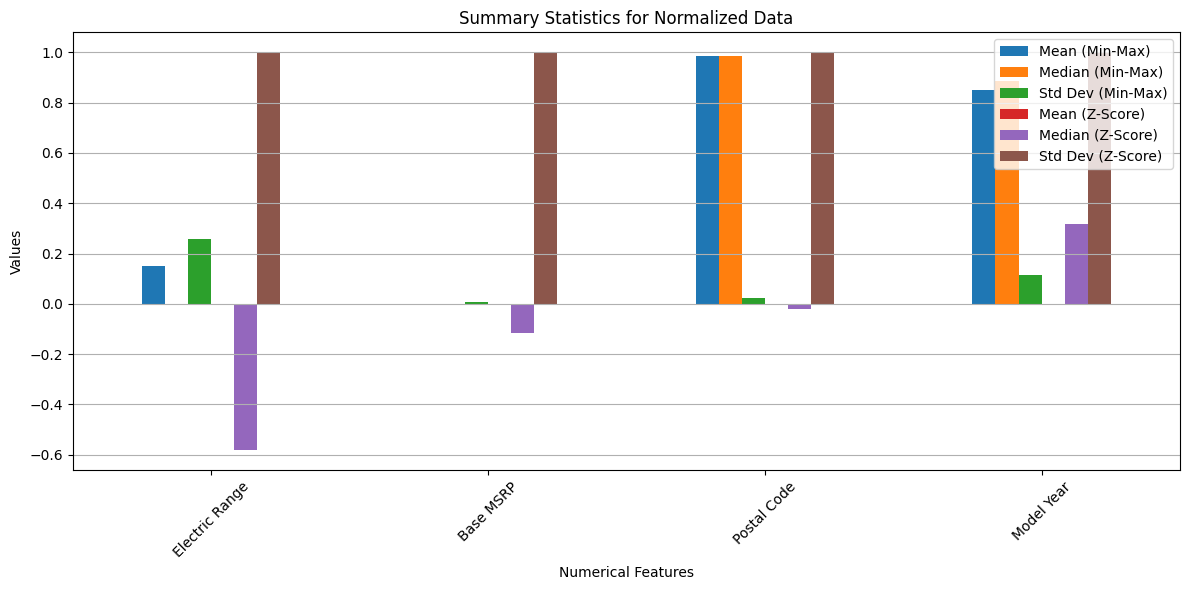

In [5]:
# 5. Descriptive Statistics: Calculate summary statistics (mean, median, standard deviation) for
# numerical features.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Select numerical columns for normalization
numerical_columns = ['Electric Range', 'Base MSRP', 'Postal Code', 'Model Year']

# Initialize scalers
min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()

# Normalize numerical features using Min-Max Scaling
normalized_min_max = dataFrame.copy()
normalized_min_max[numerical_columns] = min_max_scaler.fit_transform(normalized_min_max[numerical_columns])

# Normalize numerical features using Z-Score Normalization (Standardization)
normalized_z_score = dataFrame.copy()
normalized_z_score[numerical_columns] = z_score_scaler.fit_transform(normalized_z_score[numerical_columns])

# Calculate summary statistics for Min-Max normalized data
min_max_stats = normalized_min_max[numerical_columns].agg(['mean', 'median', 'std']).T
min_max_stats.columns = ['Mean (Min-Max)', 'Median (Min-Max)', 'Std Dev (Min-Max)']

# Calculate summary statistics for Z-Score normalized data
z_score_stats = normalized_z_score[numerical_columns].agg(['mean', 'median', 'std']).T
z_score_stats.columns = ['Mean (Z-Score)', 'Median (Z-Score)', 'Std Dev (Z-Score)']

# Combine the statistics into one DataFrame for easy comparison
summary_stats = pd.concat([min_max_stats, z_score_stats], axis=1)

# Display the summary statistics
print("Summary Statistics for Normalized Data:")
print(summary_stats)

# Plotting summary statistics
summary_stats.plot(kind='bar', figsize=(12, 6))
plt.title("Summary Statistics for Normalized Data")
plt.xlabel("Numerical Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [6]:
!pip install pandas matplotlib seaborn geopandas shapely contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 66.8 MB/s eta 0:00:00


<ipython-input-7-7bd7f578e21f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='EV Count', data=ev_counts_by_city.head(20), palette='Blues_d')


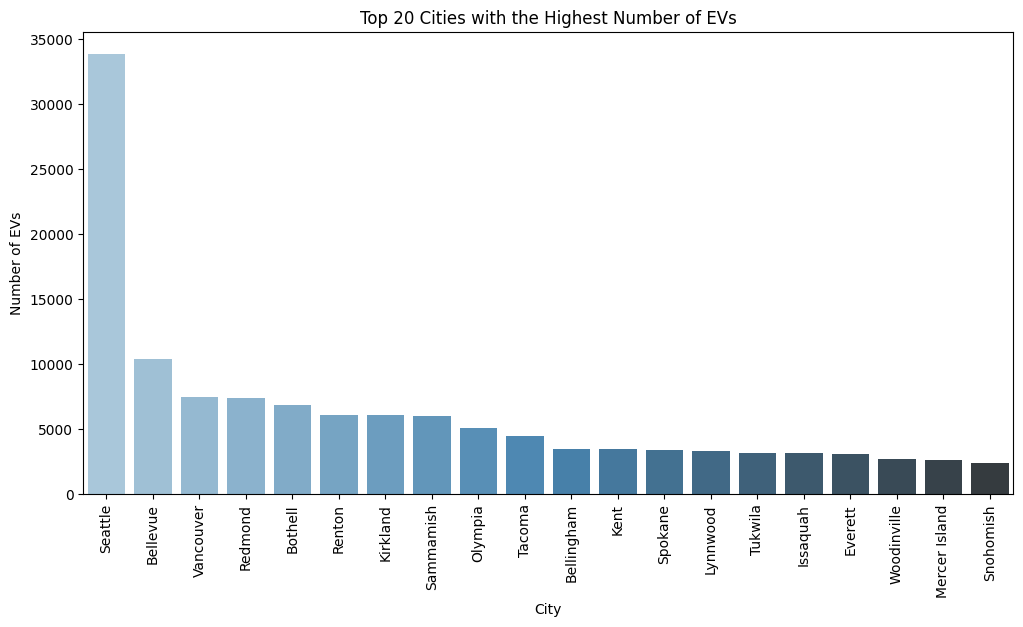

<ipython-input-7-7bd7f578e21f>:54: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_point = city_data.geometry.unary_union.centroid
<ipython-input-7-7bd7f578e21f>:54: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_point = city_data.geometry.unary_union.centroid
<ipython-input-7-7bd7f578e21f>:54: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_point = city_data.geometry.unary_union.centroid
<ipython-input-7-7bd7f578e21f>:54: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_point = city_data.geometry.unary_union.centroid
<ipython-input-7-7bd7f578e21f>:54: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_point = city_data.geometry.unary_union.centroid
<ipython-input-7-7bd7f578e21f>:54: Deprecatio

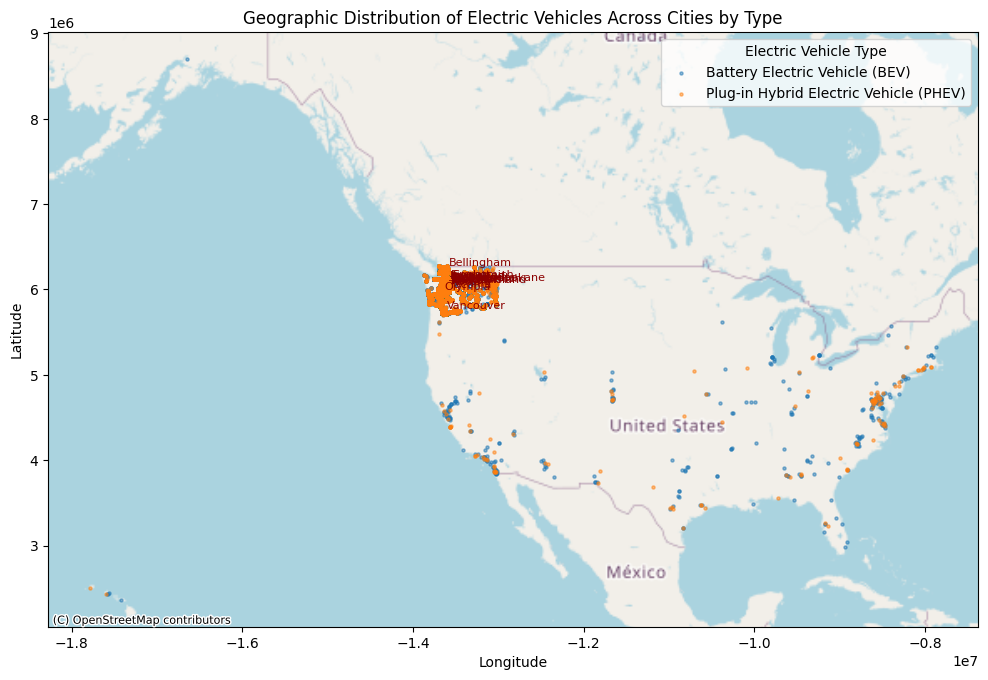


DataFrame Shape: (210165, 19)


In [7]:
# 6. Spatial Distribution: Visualize the spatial distribution of EVs across locations (e.g., maps).


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

# Check if necessary columns exist
required_columns = ['Vehicle Location', 'Electric Vehicle Type', 'City']
if not all(col in dataFrame.columns for col in required_columns):
    raise ValueError("DataFrame must include 'Vehicle Location', 'Electric Vehicle Type', and 'City'.")

# Extract latitude and longitude from 'Vehicle Location'
dataFrame['Longitude'] = dataFrame['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)')[0].astype(float)
dataFrame['Latitude'] = dataFrame['Vehicle Location'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)')[1].astype(float)

# Group the data by 'City' to get the count of EVs per city
ev_counts_by_city = dataFrame.groupby('City').size().reset_index(name='EV Count')

# Sort the data to display the cities with the most EVs
ev_counts_by_city = ev_counts_by_city.sort_values(by='EV Count', ascending=False)

# Plot the distribution using a bar plot (for top 20 cities)
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='EV Count', data=ev_counts_by_city.head(20), palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Top 20 Cities with the Highest Number of EVs')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.show()

# Create a GeoDataFrame for map plotting
gdf = gpd.GeoDataFrame(
    dataFrame,
    geometry=[Point(xy) for xy in zip(dataFrame['Longitude'], dataFrame['Latitude'])],
    crs="EPSG:4326"
)
gdf = gdf.to_crs(epsg=3857)  # Convert to Web Mercator projection for compatibility with contextily

# Plot the geographic distribution on a map, with color distinction for EV types
fig, ax = plt.subplots(figsize=(12, 8))
for ev_type, data in gdf.groupby('Electric Vehicle Type'):
    data.plot(ax=ax, marker='o', label=ev_type, alpha=0.5, markersize=5)

# Annotate top cities with names
top_cities = ev_counts_by_city.head(20)
for _, row in top_cities.iterrows():
    # Get the city's coordinates (centroid of all points in the city)
    city_data = gdf[gdf['City'] == row['City']]
    if not city_data.empty:
        city_point = city_data.geometry.unary_union.centroid
        ax.annotate(row['City'], xy=(city_point.x, city_point.y), xytext=(3, 3),
                    textcoords="offset points", fontsize=8, color='darkred')

# Add basemap for spatial context
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Finalize plot aesthetics
ax.set_title('Geographic Distribution of Electric Vehicles Across Cities by Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Display the shape of the DataFrame
print("\nDataFrame Shape:", dataFrame.shape)


<ipython-input-8-52a455738b56>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Count', data=ev_model_counts.head(20), palette='viridis')


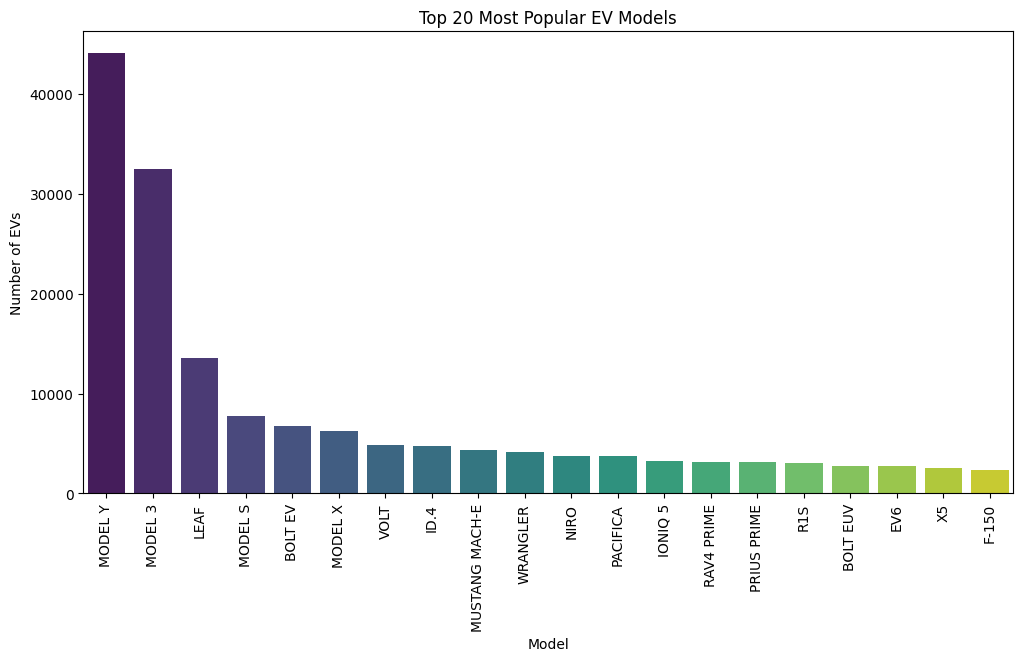

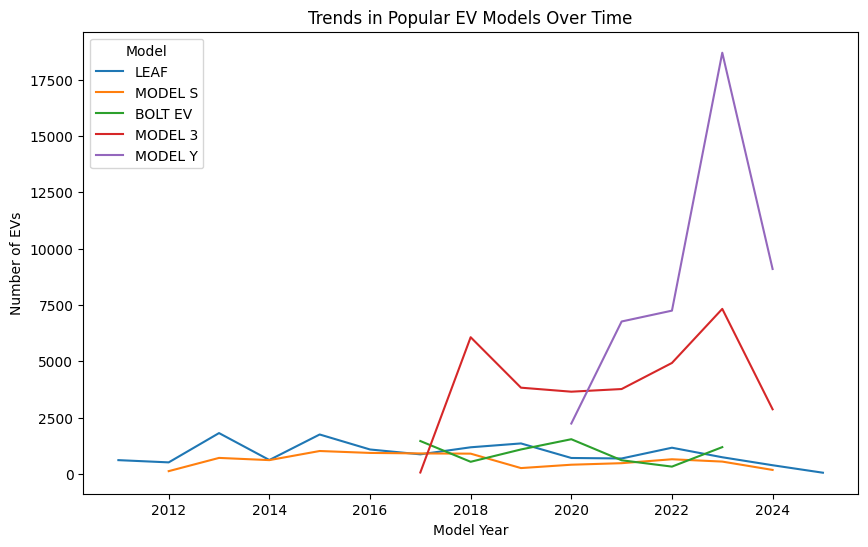

In [8]:
# 7. Model Popularity: Analyze the popularity of different EV models (categorical data) and identify any trends

#  Group the data by 'Model' to count the number of EVs for each model
ev_model_counts = dataFrame.groupby('Model').size().reset_index(name='Count')

# Sort the data to display the most popular models first
ev_model_counts = ev_model_counts.sort_values(by='Count', ascending=False)

# Step 3: Plot the popularity of EV models (Top 20)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Count', data=ev_model_counts.head(20), palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Most Popular EV Models')
plt.xlabel('Model')
plt.ylabel('Number of EVs')
plt.show()

# Group by 'Model Year' and 'Model' to see trends in model popularity over the years
ev_model_year_trends = dataFrame.groupby(['Model Year', 'Model']).size().reset_index(name='Count')

# Plot the trend of EV models over time (Top 5 most popular models)
top_5_models = ev_model_counts['Model'].head(5)
filtered_trends = ev_model_year_trends[ev_model_year_trends['Model'].isin(top_5_models)]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Model Year', y='Count', hue='Model', data=filtered_trends)
plt.title('Trends in Popular EV Models Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.legend(title='Model')
plt.show()


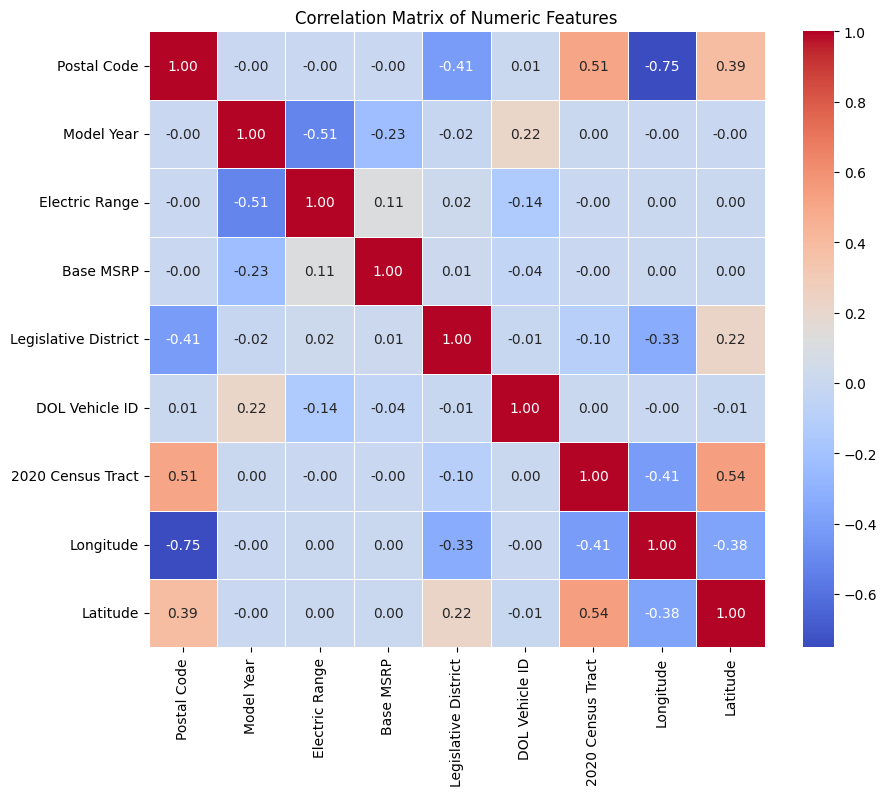

In [9]:
# 8. Investigate the relationship between every pair of numeric features. Are there any correlations? Explain the results.

import numpy as np

# Identify numeric features
numeric_features = dataFrame.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = dataFrame[numeric_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


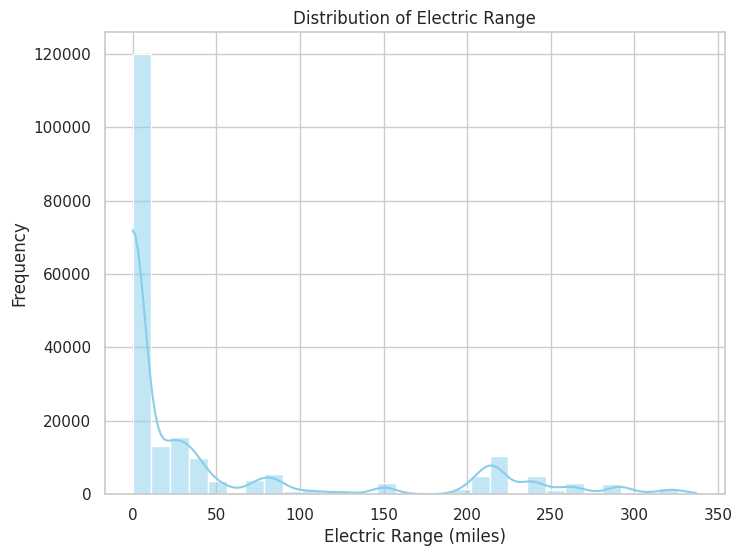

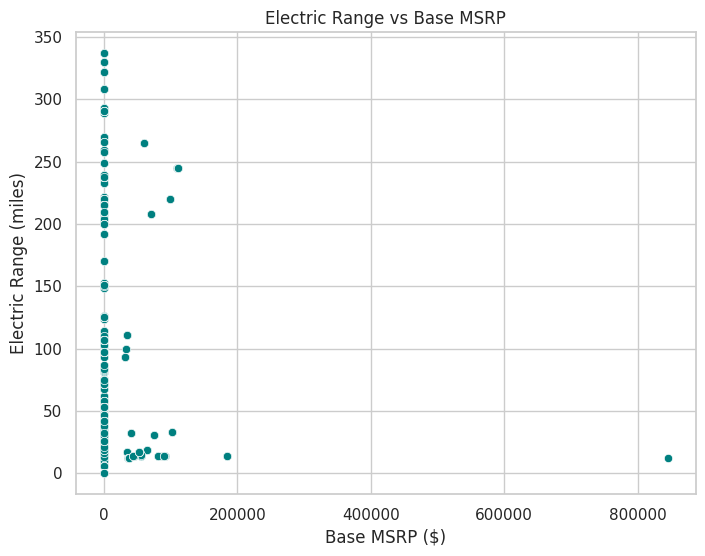

<ipython-input-10-5818a77e8db4>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model Year', y='Electric Range', data=dataFrame, palette='viridis')


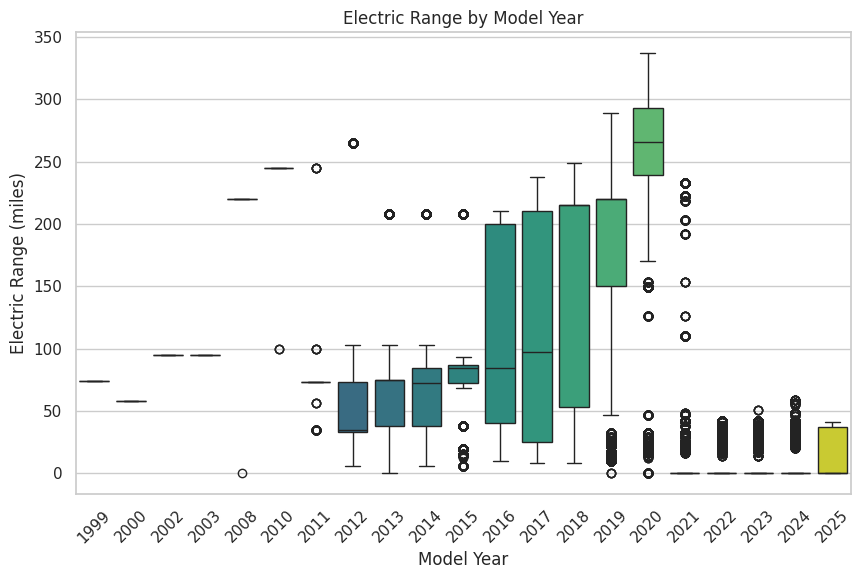

In [10]:
# 9. Data Exploration Visualizations: Create various visualizations (e.g., histograms, scatter
# plots, boxplots) to explore the relationships between features

sns.set(style="whitegrid")


# Histogram for Electric Range
plt.figure(figsize=(8, 6))
sns.histplot(dataFrame['Electric Range'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Electric Range vs Base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=dataFrame, color='teal')
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()

# Boxplot for Electric Range by Model Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=dataFrame, palette='viridis')
plt.title('Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-0397f590c7e7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByCity.index, y=countByCity.values, palette='Blues_d')


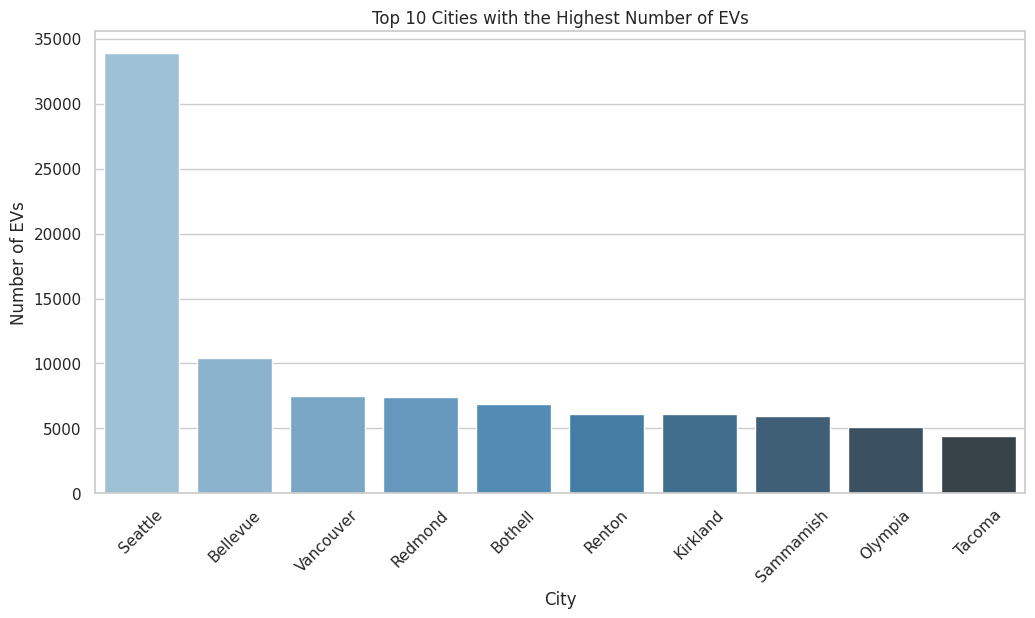

<ipython-input-11-0397f590c7e7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByCountry.index, y=countByCountry.values, palette='Purples_d')


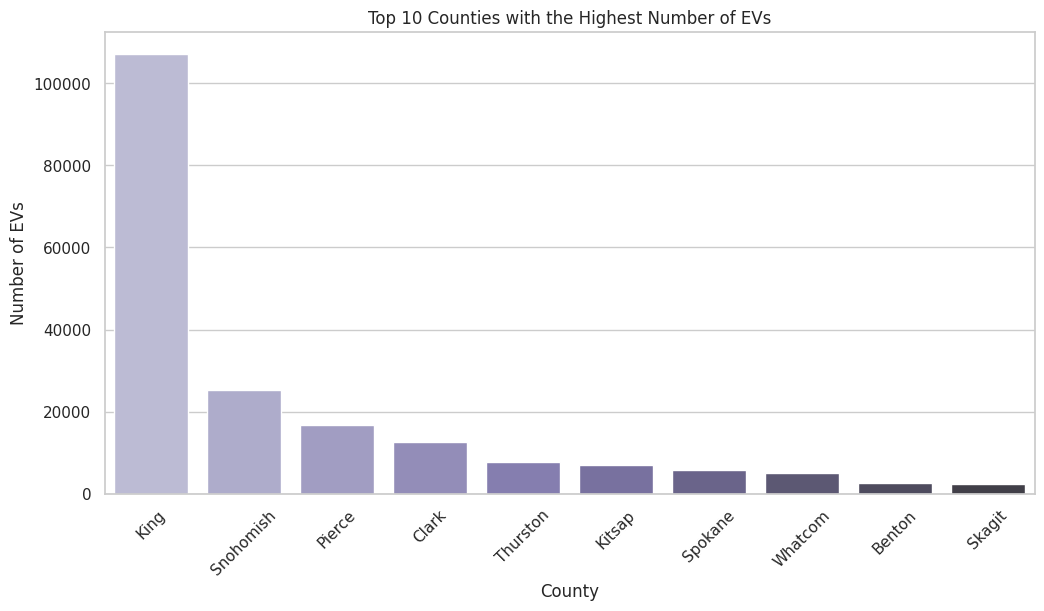

In [11]:
# 10. Comparative Visualization: Compare the distribution of EVs across different locations
# (cities, counties) using bar charts or stacked bar charts.

# Count of EVs per City
countByCity = dataFrame['City'].value_counts().head(10)  # Top 10 cities

plt.figure(figsize=(12, 6))
sns.barplot(x=countByCity.index, y=countByCity.values, palette='Blues_d')
plt.title('Top 10 Cities with the Highest Number of EVs')
plt.xlabel('City')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.show()

if 'County' in dataFrame.columns:
    countByCountry = dataFrame['County'].value_counts().head(10)  # Top 10 counties

    plt.figure(figsize=(12, 6))
    sns.barplot(x=countByCountry.index, y=countByCountry.values, palette='Purples_d')
    plt.title('Top 10 Counties with the Highest Number of EVs')
    plt.xlabel('County')
    plt.ylabel('Number of EVs')
    plt.xticks(rotation=45)
    plt.show()

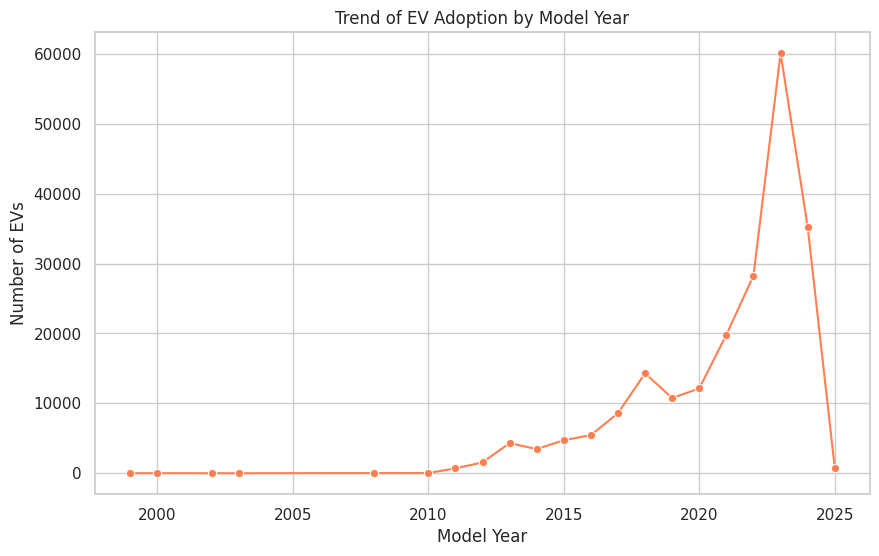

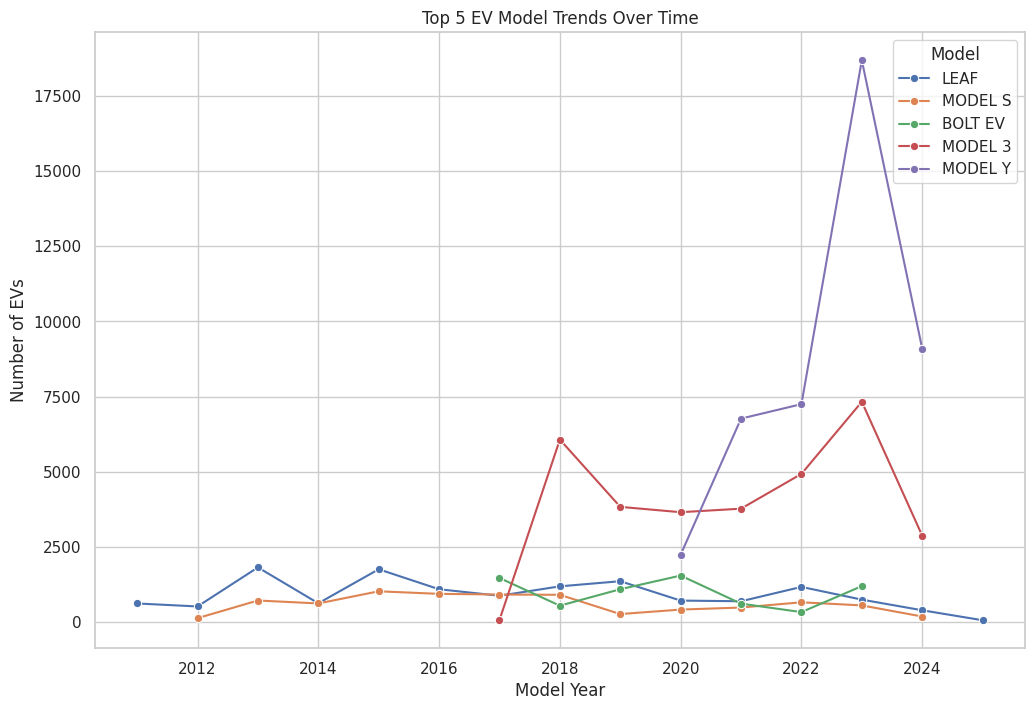

In [12]:
# 11. Temporal Analysis (Optional): If the dataset includes data across multiple time points, analyze the temporal trends in EV adoption rates and model popularity.

# EV count by Model Year
countByYear = dataFrame['Model Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=countByYear.index, y=countByYear.values, marker="o", color='coral')
plt.title('Trend of EV Adoption by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.show()

# Popular EV Models Over Time
trendModelYear = dataFrame.groupby(['Model Year', 'Model']).size().reset_index(name='Count')
top_models = trendModelYear.groupby('Model')['Count'].sum().nlargest(5).index  # Top 5 models
filtered_trends = trendModelYear[trendModelYear['Model'].isin(top_models)]

plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='Count', hue='Model', data=filtered_trends, marker="o")
plt.title('Top 5 EV Model Trends Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.legend(title='Model')
plt.show()